In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing lib

In [26]:
df = pd.read_csv('RS_Session_266_AU_349_A_to_C_viii (3).csv')

Reading the dataset

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sl. No.               23 non-null     object 
 1   State                 23 non-null     object 
 2   No. of Organizations  23 non-null     float64
 3   2021-22               23 non-null     float64
 4   2022-23               23 non-null     float64
 5   2023-24               23 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.2+ KB


This dataset contains 23 rows and 6 columns, representing information about organizations across different states over three years. 
The columns include:
Sl. No. – Serial number (unique for each row).
State – Name of the state (23 unique states).
No. of Organizations – Number of organizations in each state.



In [29]:
df.head()

,Sl. No.,State,No. of Organizations,2021-22,2022-23,2023-24
0,1,Andhra Pradesh,3.0,112.50,387.60,286.0
1,2,Arunachal Pradesh,1.0,112.50,200.00,360.0
2,3,Gujarat,1.0,112.50,125.00,125.0
3,4,Himachal Pradesh,1.0,112.50,333.87,286.0
4,5,Haryana,1.0,27.73,200.00,286.0


In [7]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Sl. No.                  0
State                    0
No. of Organizations     0
2021-22                 10
2022-23                 14
2023-24                 10
dtype: int64


count of missing values per column

In [31]:
print(df.columns) 

Index(['Sl. No.', 'State', 'No. of Organizations', '2021-22', '2022-23',
       '2023-24'],
      dtype='object')


In [32]:
df = df.drop_duplicates()


 Drop Empty or Unnecessary Columns

In [33]:
print(df.shape) 

(23, 6)


Identify numerical and categorical columns for appropriate handling of missing values

In [11]:
numeric_cols = df.select_dtypes(include=['number']).columns  
categorical_cols = df.select_dtypes(include=['object']).columns

Columns with numerical data
Columns with categorical data

In [13]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

Fill missing values: 
For numerical columns, replace NaNs with the median value
For categorical columns, replace NaNs with the most frequent value (mode)

In [34]:
print("Missing Values After Cleaning:")
print(df.isnull().sum())

Missing Values After Cleaning:
Sl. No.                 0
State                   0
No. of Organizations    0
2021-22                 0
2022-23                 0
2023-24                 0
dtype: int64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sl. No.               23 non-null     object 
 1   State                 23 non-null     object 
 2   No. of Organizations  23 non-null     float64
 3   2021-22               23 non-null     float64
 4   2022-23               23 non-null     float64
 5   2023-24               23 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.3+ KB


Data cleaned

# Data Visualization

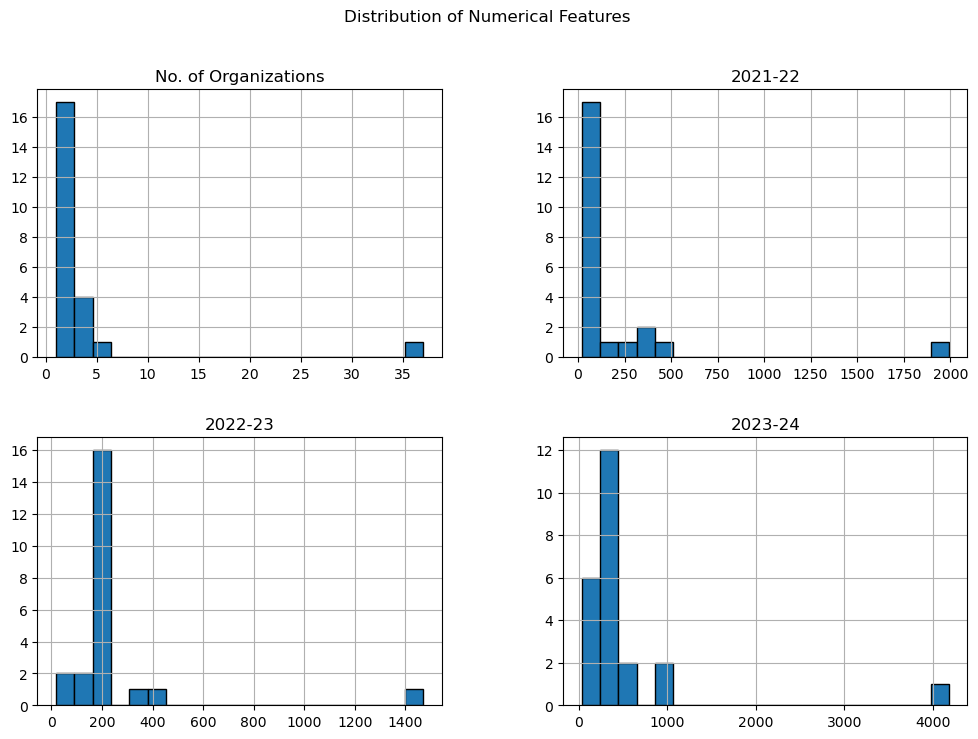

In [36]:
df[numeric_cols].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

 histograms that display the distribution of numerical features

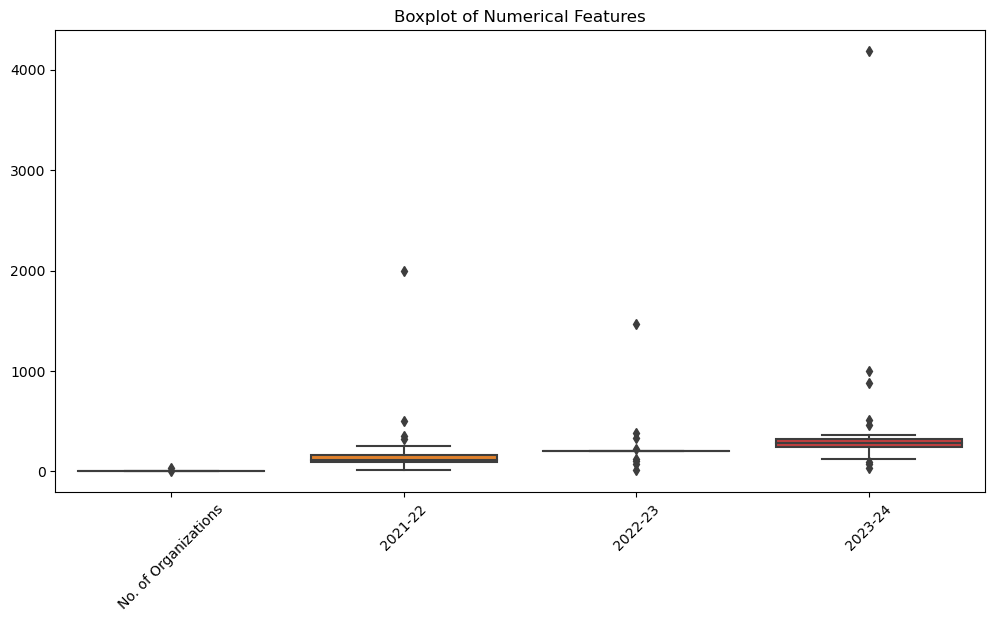

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


boxplot to detect potential outliers in numerical columns

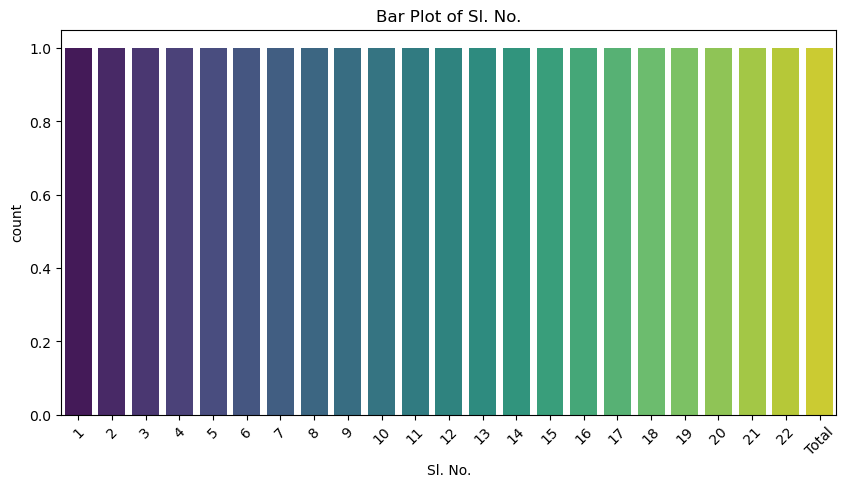

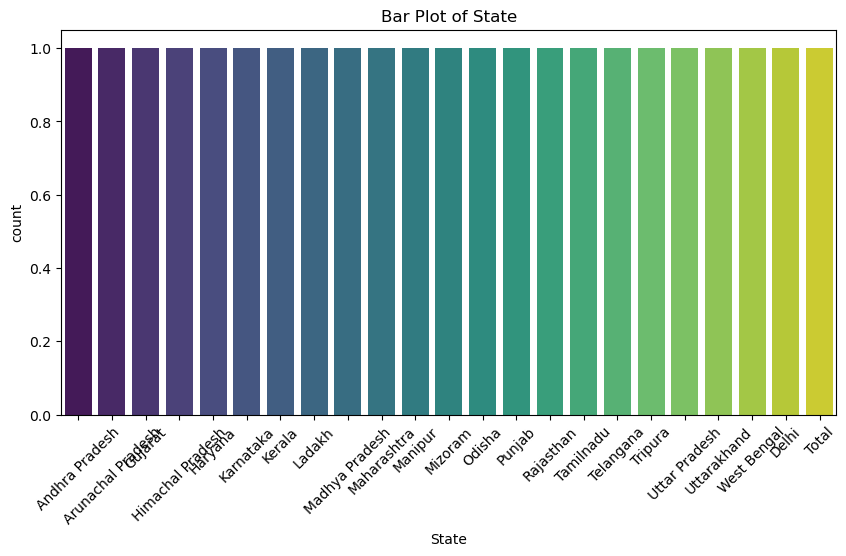

In [20]:
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Bar Plot of {col}')
    plt.show()


Bar plot for categorical features

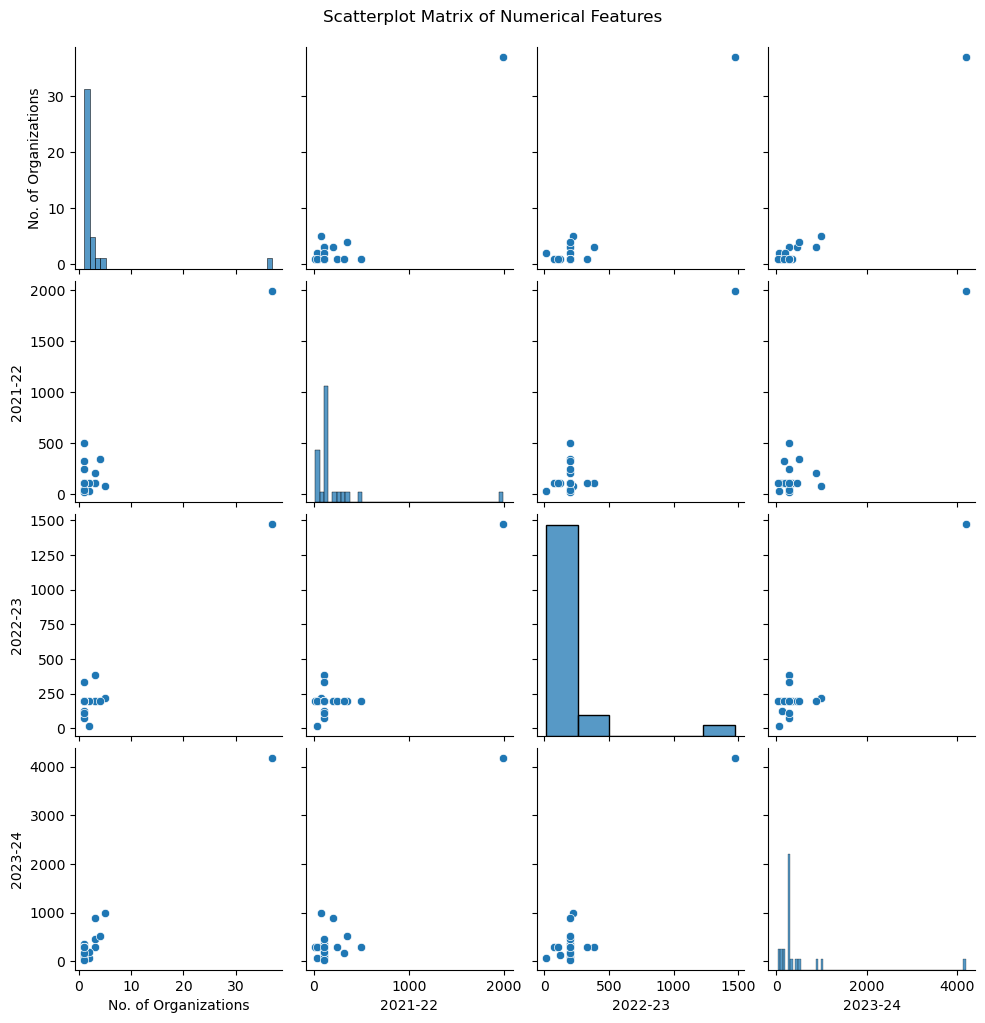

In [21]:
if len(numeric_cols) > 1:
    sns.pairplot(df[numeric_cols])
    plt.suptitle('Scatterplot Matrix of Numerical Features', y=1.02)
    plt.show()


Scatter plot that diaplays relationships between numerical features

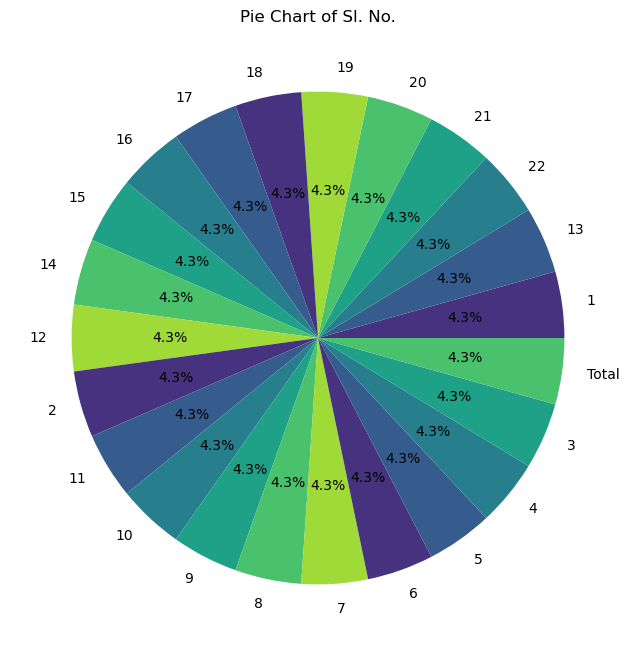

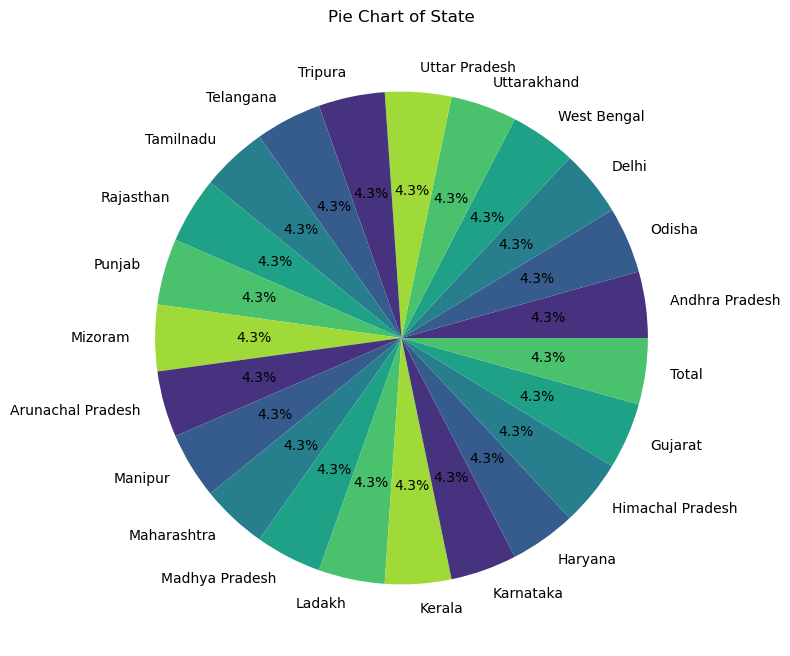

In [22]:
for col in categorical_cols:
    plt.figure(figsize=(8,8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

Pie chart for categorical features

C:\Users\saiva\AppData\Local\Temp\ipykernel_19940\2757785859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


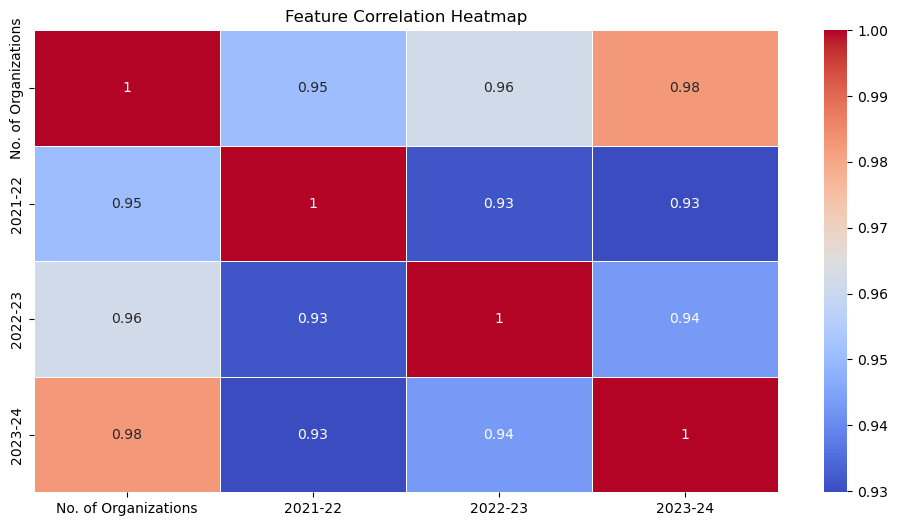

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

heatmap to visualize feature correlations